In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib as mpl

In [3]:
df = pd.read_csv('task19.csv', encoding="windows-1251", sep=";")

In [4]:
df

,Дата,Пункт отправления,Пункт назначения,Расстояние,Расход бензина,Масса груза
0,1 октября,Липки,Березки,432,63,770
1,1 октября,Орехово,Дубки,121,17,670
2,1 октября,Осинки,Вязово,333,47,830
3,1 октября,Липки,Вязово,384,54,730
4,1 октября,Березки,Буково,135,19,540
...,...,...,...,...,...,...
365,9 октября,Березки,Буково,133,17,750
366,9 октября,Вязово,Сосново,336,47,750
367,9 октября,Осинки,Орехово,197,23,750
368,9 октября,Осинки,Липки,184,25,520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Дата               370 non-null    object
 1   Пункт отправления  370 non-null    object
 2   Пункт назначения   370 non-null    object
 3   Расстояние         370 non-null    int64 
 4   Расход бензина     370 non-null    int64 
 5   Масса груза        370 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 17.5+ KB


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [8]:
fuel_labels = df['Дата'].unique()

In [9]:
fuel_labels

array(['1 октября', '2 октября', '3 октября', '4 октября', '5 октября',
       '6 октября', '7 октября', '8 октября', '9 октября'], dtype=object)

In [13]:
fuel_data = df.groupby(['Дата']).sum()['Расход бензина']

In [14]:
fuel_data

Дата
1 октября     979
2 октября    1641
3 октября    1407
4 октября    1503
5 октября    1422
6 октября    1376
7 октября    1420
8 октября    1145
9 октября    1730
Name: Расход бензина, dtype: int64

In [20]:
fuel_colors = sns.color_palette('pastel')[0:9]

([<matplotlib.patches.Wedge at 0x1ace60135b0>,
 [Text(1.0675097497445698, 0.2653731979689852, '1 октября'),
  Text(0.6874581626080926, 0.858720719828924, '2 октября'),
  Text(-0.09174185961353616, 1.0961676109038483, '3 октября'),
  Text(-0.7949959488418171, 0.7602509068229376, '4 октября'),
  Text(-1.0993227778517012, 0.038593135353577813, '5 октября'),
  Text(-0.8681342078786425, -0.6755316403477503, '6 октября'),
  Text(-0.23324421761770747, -1.0749870394325243, '7 октября'),
  Text(0.4532632749115189, -1.002273617140791, '8 октября'),
  Text(0.9996054997536583, -0.459117463033415, '9 октября')],
 [Text(0.5822780453152199, 0.1447490170739919, '8%'),
  Text(0.3749771796044141, 0.46839311990668575, '13%'),
  Text(-0.05004101433465608, 0.5979096059475535, '11%'),
  Text(-0.4336341539137184, 0.4146823128125114, '12%'),
  Text(-0.5996306061009278, 0.021050801101951535, '11%'),
  Text(-0.47352774975198675, -0.36847180382604555, '11%'),
  Text(-0.12722411870056768, -0.586356566963195, '11%

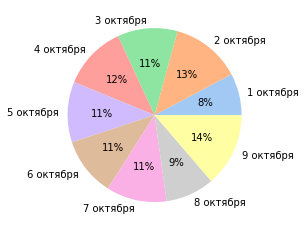

In [21]:
plt.pie(fuel_data, labels = fuel_labels, colors = fuel_colors, autopct='%.0f%%')

In [22]:
df

,Дата,Пункт отправления,Пункт назначения,Расстояние,Расход бензина,Масса груза
0,1 октября,Липки,Березки,432,63,770
1,1 октября,Орехово,Дубки,121,17,670
2,1 октября,Осинки,Вязово,333,47,830
3,1 октября,Липки,Вязово,384,54,730
4,1 октября,Березки,Буково,135,19,540
...,...,...,...,...,...,...
365,9 октября,Березки,Буково,133,17,750
366,9 октября,Вязово,Сосново,336,47,750
367,9 октября,Осинки,Орехово,197,23,750
368,9 октября,Осинки,Липки,184,25,520


In [41]:
from_data = df.groupby(['Пункт отправления']).count()

In [45]:
from_data

,Дата,Пункт назначения,Расстояние,Расход бензина,Масса груза
Пункт отправления,,,,,
Березки,40,40,40,40,40
Буково,42,42,42,42,42
Вязово,51,51,51,51,51
Дубки,43,43,43,43,43
Липки,57,57,57,57,57
Орехово,41,41,41,41,41
Осинки,43,43,43,43,43
Сосново,53,53,53,53,53


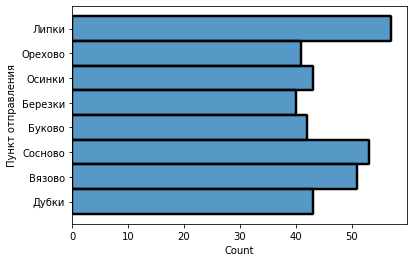

In [63]:
dp = sns.histplot(data=df, y="Пункт отправления")

In [90]:
mean_weight_data = df.groupby(['Пункт назначения']).mean()['Масса груза']

In [94]:
mean_weight_data

Пункт назначения
Березки    779.400000
Буково     752.708333
Вязово     770.000000
Дубки      687.750000
Липки      760.930233
Орехово    766.981132
Осинки     768.400000
Сосново    736.304348
Name: Масса груза, dtype: float64

In [91]:
mean_weight_labels = df['Пункт назначения'].unique()

In [92]:
mean_weight_labels = np.sort(mean_weight_labels)
mean_weight_labels

array(['Березки', 'Буково', 'Вязово', 'Дубки', 'Липки', 'Орехово',
       'Осинки', 'Сосново'], dtype=object)

([<matplotlib.patches.Wedge at 0x1ace7e95b50>,
 [Text(1.010330909343609, 0.43500741789642655, 'Березки'),
  Text(0.3926543530983896, 1.027532266643187, 'Буково'),
  Text(-0.4578609850876597, 1.0001816426702492, 'Вязово'),
  Text(-1.0210958248165978, 0.4091006190927997, 'Дубки'),
  Text(-1.0237068941956664, -0.4025222910302769, 'Липки'),
  Text(-0.4274866482473999, -1.013535971522572, 'Орехово'),
  Text(0.43016870399490353, -1.0124005561551936, 'Осинки'),
  Text(1.0198540554133637, -0.4121864937827488, 'Сосново')],
 [Text(0.5510895869146958, 0.2372767733980508, '779'),
  Text(0.21417510169003065, 0.5604721454417383, '753'),
  Text(-0.24974235550235982, 0.5455536232746814, '770'),
  Text(-0.5569613589908715, 0.2231457922324362, '688'),
  Text(-0.5583855786521815, -0.21955761328924192, '761'),
  Text(-0.23317453540767263, -0.5528378026486757, '767'),
  Text(0.23463747490631098, -0.55221848517556, '768'),
  Text(0.556284030225471, -0.22482899660877204, '736')])

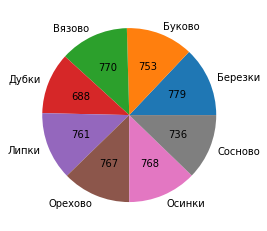

In [93]:
plt.pie(mean_weight_data, labels = mean_weight_labels, autopct= lambda x: '{:.0f}'.format(x*mean_weight_data.sum()/100))